In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from keras.preprocessing.image import load_img, ImageDataGenerator
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
path = "dogs-vs-cats/train/train/"

filenames = np.array(os.listdir(path))

In [3]:
categories = []

for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    elif category == 'cat':
        categories.append(0)

In [4]:
df = pd.DataFrame({'filename': filenames, 'category': categories}).reset_index(drop=True); df.head(5)

,filename,category
0,dog.8011.jpg,1
1,cat.5077.jpg,0
2,dog.7322.jpg,1
3,cat.2718.jpg,0
4,cat.10151.jpg,0


In [5]:
df = df.replace({1: "dog" , 0: "cat"})

In [6]:
df.head(5)

,filename,category
0,dog.8011.jpg,dog
1,cat.5077.jpg,cat
2,dog.7322.jpg,dog
3,cat.2718.jpg,cat
4,cat.10151.jpg,cat


In [7]:
image = load_img(path+df["filename"][0])

In [8]:
df["filename"][0]

'dog.8011.jpg'

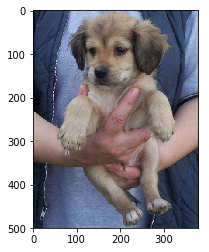

In [9]:
plt.imshow(image)

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout, Activation, BatchNormalization
from keras.optimizers import RMSprop
from keras.losses import binary_crossentropy, categorical_crossentropy
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [11]:
optimizer = RMSprop(learning_rate=0.001)

In [12]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(5,5), input_shape=(128,128,3)))
model.add(Conv2D(64, kernel_size=(5,5)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, kernel_size=(5,5)))
model.add(Conv2D(32, kernel_size=(5,5)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer=optimizer, loss=categorical_crossentropy, metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 124, 64)      4864      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 120, 120, 64)      102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 120, 120, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 60, 60, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 32)        51232     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 52, 52, 32)       

In [13]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=420)

In [14]:
train_df.head(5)

,filename,category
6492,dog.8264.jpg,dog
17934,dog.6682.jpg,dog
9337,dog.8716.jpg,dog
6523,dog.11439.jpg,dog
17757,cat.11803.jpg,cat


In [15]:
train_generator = ImageDataGenerator(rescale=1./255,
                                     zoom_range=0.1, width_shift_range=0.2, height_shift_range=0.2,
                                    horizontal_flip=True, vertical_flip=True)
test_generator = ImageDataGenerator(rescale=1./255)

In [27]:
training_set = train_generator.flow_from_dataframe(train_df, "dogs-vs-cats/train/train/", batch_size=16,
                                                   class_mode="categorical", target_size=(128,128),
                                                  y_col="category")

Found 20000 validated image filenames belonging to 2 classes.


In [28]:
history = model.fit_generator(training_set, epochs=3)

Epoch 1/3
  44/1250 [>.............................] - ETA: 1:04:44 - loss: 1.3691 - accuracy: 0.4957

KeyboardInterrupt: 